In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
data=pd.read_csv("C:\\Users\\shiva_l99fyzx\\Downloads\\archive (4)\\customer_churn.csv")

In [11]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [12]:
data.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [13]:
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Names, Age, Total_Purchase, Account_Manager, Years, Num_Sites, Onboard_date, Location, Company, Churn]
Index: []


In [15]:
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [17]:
x = data.drop('Churn', axis=1)
y = data['Churn']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x.shape

(900, 9)

In [21]:
y.shape

(900,)

In [22]:
x_train.shape

(720, 9)

In [23]:
y_train.shape

(720,)

In [24]:
x_test.shape

(180, 9)

In [25]:
y_test.shape

(180,)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data.describe(include="all")

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
count,900,900.000000,900.000000,900.000000,900.000000,900.000000,900,900,900,900.000000
unique,899,NaN,NaN,NaN,NaN,NaN,900,900,873,NaN
top,Jennifer Wood,NaN,NaN,NaN,NaN,NaN,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Anderson Group,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,1,1,4,NaN
mean,NaN,41.816667,10062.824033,0.481111,5.273156,8.587778,NaN,NaN,NaN,0.166667
std,NaN,6.127560,2408.644532,0.499921,1.274449,1.764836,NaN,NaN,NaN,0.372885
min,NaN,22.000000,100.000000,0.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000
25%,NaN,38.000000,8497.122500,0.000000,4.450000,7.000000,NaN,NaN,NaN,0.000000
50%,NaN,42.000000,10045.870000,0.000000,5.215000,8.000000,NaN,NaN,NaN,0.000000
75%,NaN,46.000000,11760.105000,1.000000,6.110000,10.000000,NaN,NaN,NaN,0.000000


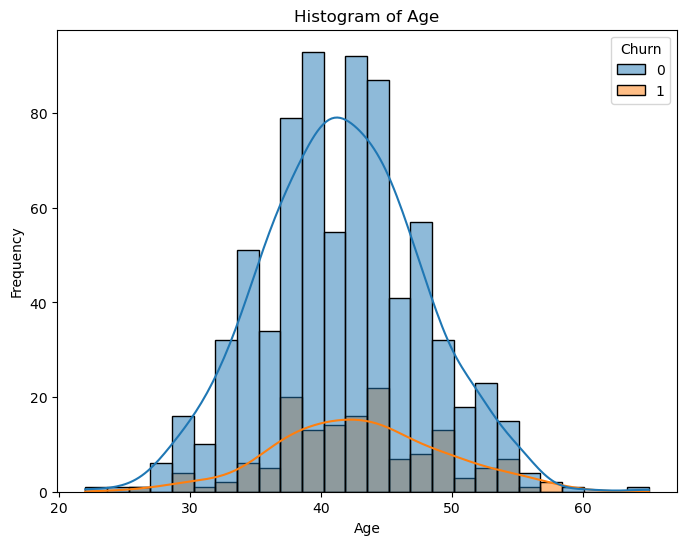

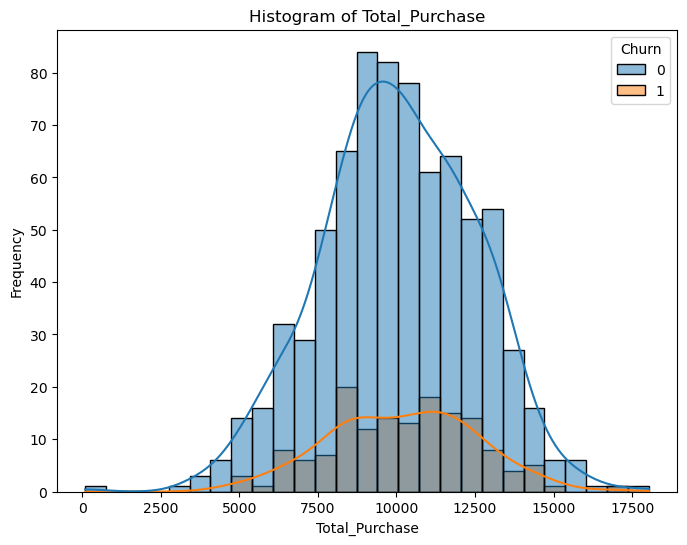

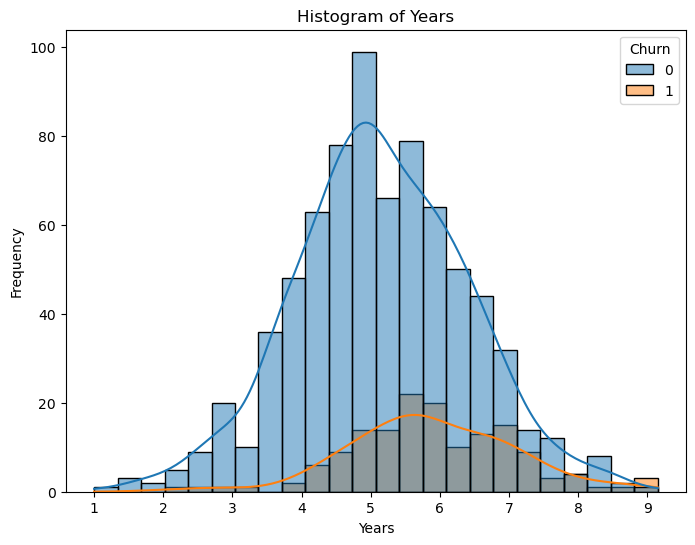

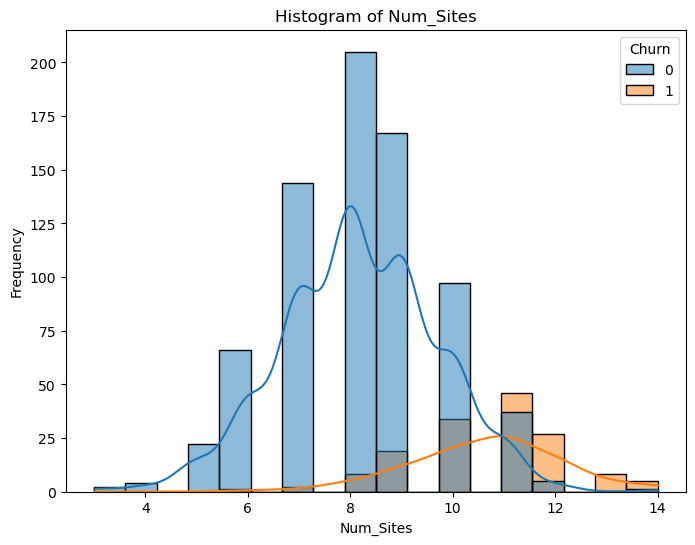

In [31]:
num= ['Age', 'Total_Purchase', 'Years', 'Num_Sites']
for var in num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=var, hue='Churn', kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

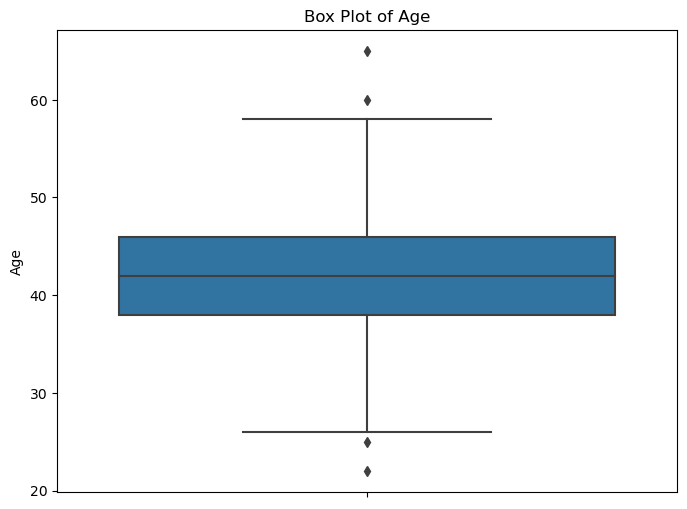

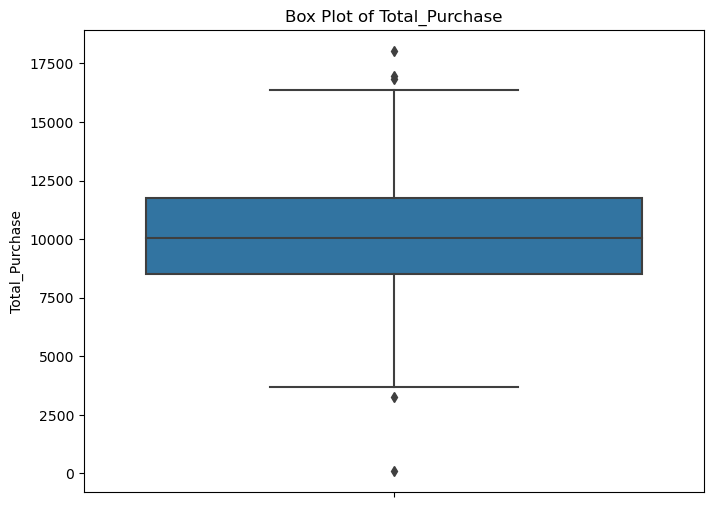

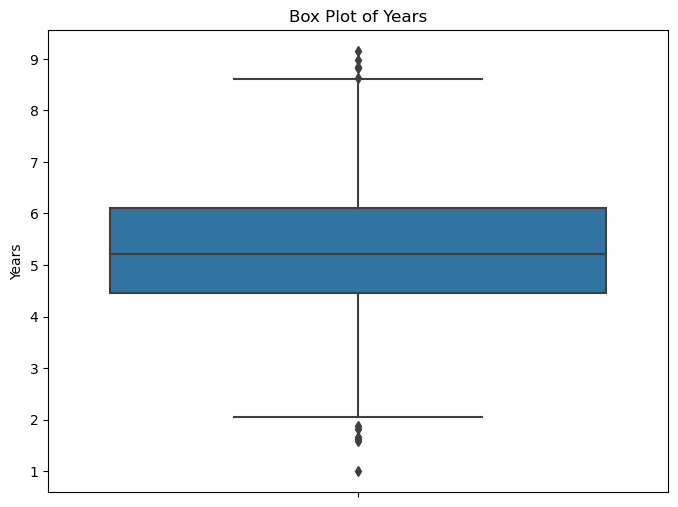

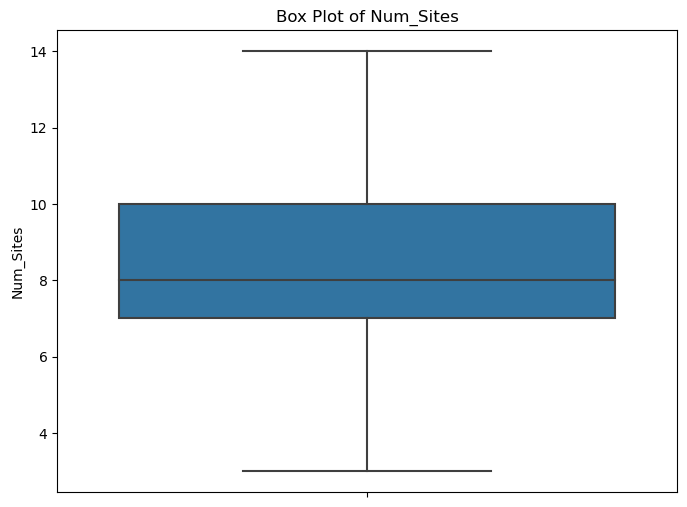

In [32]:
for var in num:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=var)
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
    plt.show()

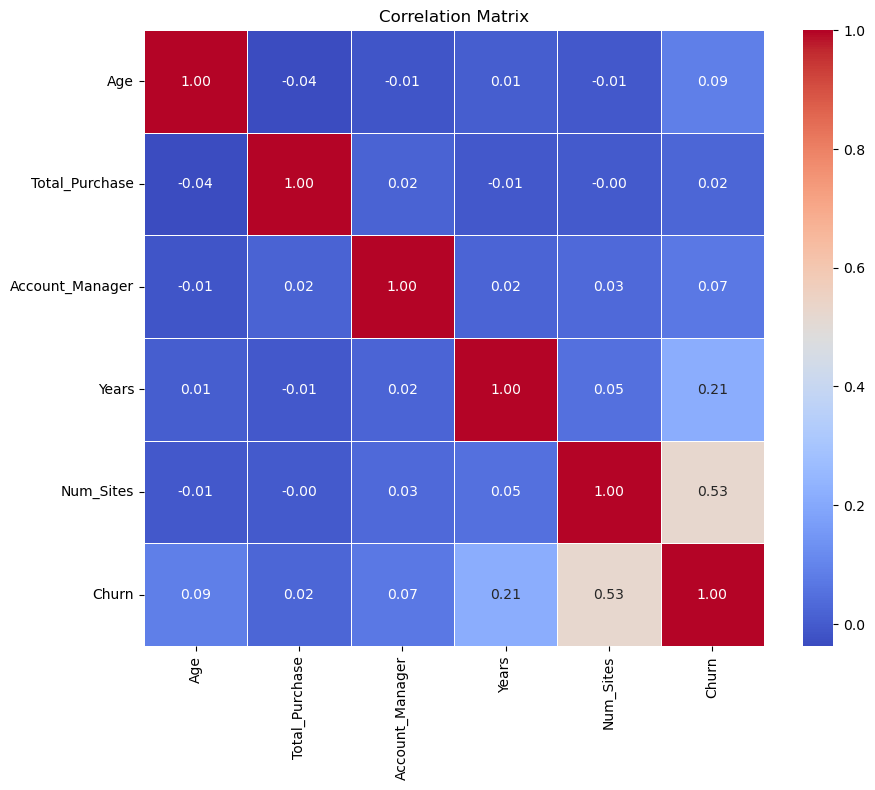

In [36]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [38]:
relevant_features = [
    'Age',
    'Total_Purchase',
    'Years',
    'Num_Sites'
]
data = data[relevant_features + ['Churn']]


In [39]:
data.head()

,Age,Total_Purchase,Years,Num_Sites,Churn
0,42.0,11066.80,7.22,8.0,1
1,41.0,11916.22,6.50,11.0,1
2,38.0,12884.75,6.67,12.0,1
3,42.0,8010.76,6.71,10.0,1
4,37.0,9191.58,5.56,9.0,1


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [50]:
x = data.drop('Churn', axis=1)
y = data['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [53]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.82
Precision: 0.50
Recall: 0.16
ROC AUC: 0.56


# Accuracy: The model achieved an accuracy of 82%, which means that 82% of the predictions made by the model were correct. However, accuracy alone may not provide a complete picture of model performance, especially in cases of imbalanced datasets.
# Precision: The precision of 50% indicates that when the model predicts a customer churn, it is correct 50% of the time. In other words, among all the instances predicted as churn, only half of them are true churn cases. This metric is crucial for cases where the cost of false positives (incorrectly predicting churn) is high.
# Recall: The recall of 16% indicates that the model correctly identifies only 16% of all actual churn cases. In other words, it misses 84% of churn cases. Recall is important when the cost of false negatives (missed churn cases) is high.
# ROC AUC: The ROC AUC score of 0.56 suggests that the model's ability to distinguish between positive and negative classes (churn and non-churn) is slightly better than random guessing. However, it's still relatively low, indicating that the model may not be very effective at discriminating between churn and non-churn instances.


# The model is good at guessing overall, but it's not catching all the customers who might leave. To improve it, we can try different methods or tools to understand the data better. Also, since there are more customers who stay than leave, we might need to balance things out to make sure the model pays attention to both groups.
